In [1]:
import numpy as np
import matplotlib.pyplot as plt
from local_projectile import local_projectile
from global_projectile import global_projectile

# Free fall from edge of space

To start, lets create a local projectile and drop it from the edge of space. We'll compare it to freefall in a vacuum.

In [2]:
# create proctile
gcs = [0,0,100000] # starting lat, lon, height above ground
v0 = 0 # initial velocity of zero
alt_az = [0,0] # initial launch angle
D = 0.1 # 10 cm
m = 1 # 1 kg
Cd = 0.47 # drag coefficient of a sphere

proj = local_projectile(gcs, v0, alt_az, D, m, Cd)

In [3]:
# use the launch_to_impact method to calculate the projectile's motion
# in this case we are just dropping it
proj.launch_to_impact()

# we can plot it to see our results
E, N, U, t = proj.solution

# the local projectile also calculates a vacuum solution for comparison
E1, N1, U1, t1 = proj.vacuum_approximation

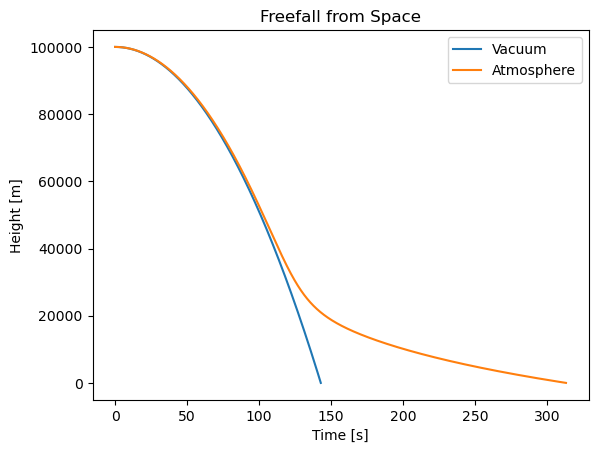

In [4]:
plt.plot(t1, U1, label='Vacuum')
plt.plot(t, U, label='Atmosphere')
plt.title('Freefall from Space')
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.legend()
plt.show()

we can create a couple other objects with various diameters and see how they compare

In [5]:
proj2 = local_projectile(gcs, v0, alt_az, D=0.25, m=1, Cd=0.47)
proj3 = local_projectile(gcs, v0, alt_az, D=0.5, m=1, Cd=0.47)
proj2.launch_to_impact()
proj3.launch_to_impact()

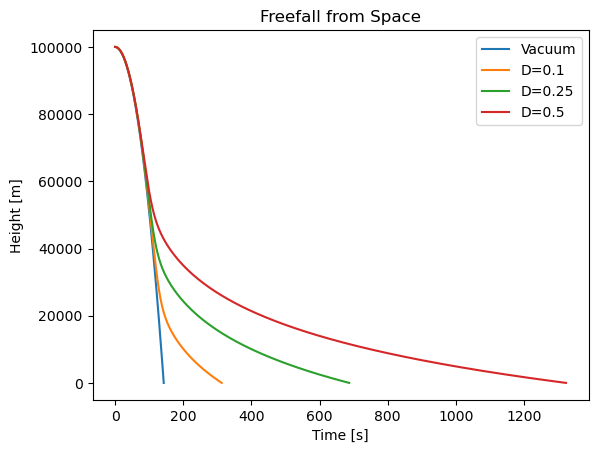

In [6]:
plt.plot(t1, U1, label='Vacuum')
plt.plot(t, U, label='D=0.1')
plt.plot(proj2.solution[3], proj2.solution[2], label='D=0.25')
plt.plot(proj3.solution[3], proj3.solution[2], label='D=0.5')
plt.title('Freefall from Space')
plt.xlabel('Time [s]')
plt.ylabel('Height [m]')
plt.legend()
plt.show()

# Projectile Motion and the Coriolis Effect
Now lets launch an object with some initial velocity. As long as we are not directly on the equator, we should be able to see some deflection due to the Earth's rotation. We'll just look at the motion in a vacuum.

In [7]:
gcs = [50,0,0]
v0 = 500
alt_az = [20, 90] # launching 20 degrees up, directly East
D = 0.1
m = 1
Cd = 0.47

proj = local_projectile(gcs, v0, alt_az, D, m, Cd)
proj.launch_to_impact(dt=0.01, approx=True) # we can specify the time increment we use to integrate with dt

With the approx=True argument, we calculate the motion in a vacuum
as well as a first order approximation of the motion with the coriolis effect. Over distances this small we shoud be well within the acceptable margin of error for these methods.

In [8]:
e_vac, n_vac, u_vac, t_vac = proj.vacuum_approximation
e_cor, n_cor, u_cor, t_cor = proj.coriolis_approximation

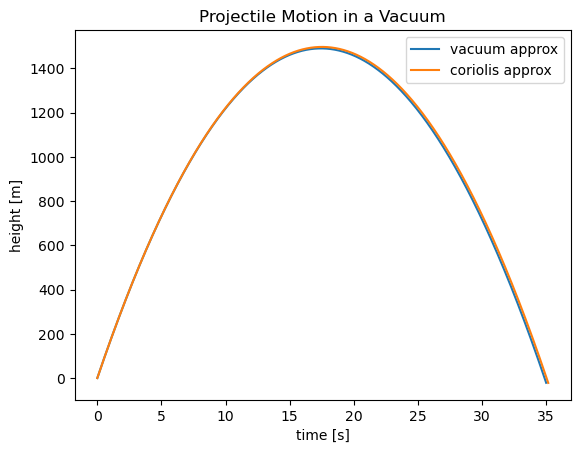

In [9]:
plt.plot(t_vac, u_vac, label='vacuum approx')
plt.plot(t_cor, u_cor, label='coriolis approx')
plt.title('Projectile Motion in a Vacuum')
plt.xlabel('time [s]')
plt.ylabel('height [m]')
plt.legend()
plt.show()

We can see that the motion in the vertical directions is approximately the same. It's only when we look at the area from the "top down" that we can see the object deflect due to the coriolis force.

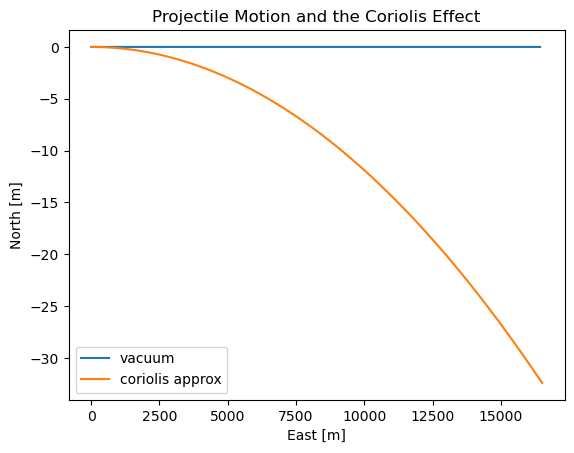

In [10]:
plt.plot(e_vac, n_vac, label='vacuum')
plt.plot(e_cor, n_cor, label='coriolis approx')
plt.title('Projectile Motion and the Coriolis Effect')
plt.xlabel('East [m]')
plt.ylabel('North [m]')
plt.legend()
plt.show()

# Latitude and the Coriolis Force
We know that the coriolis force is dependent on the latitude from which we start. We can visualize this by launching the same projectile at different latitudes. We'll launch something approximately the size of a cannonball, directly East, and see the effect of latitude on its deflection.

In [11]:
v0 = 1000
alt_az = [45, 90]
D = 0.25
m = 25
Cd = 0.47

# list of latitudes to launch from
latitudes = np.arange(-90,95,5)

# create projectiles
projectiles = []
for i in latitudes:
    gcs0 = [i,0,0]
    p = local_projectile(gcs0, v0, alt_az, D, m, Cd)
    projectiles.append(p)

# launch projectiles
for proj in projectiles:
    proj.launch_to_impact(dt=0.1, approx=False) # dont calculate approximations this time

# make list of N/S deflection
deflection = []
for proj in projectiles:
    defl = proj.solution[1][-1]
    deflection.append(defl)

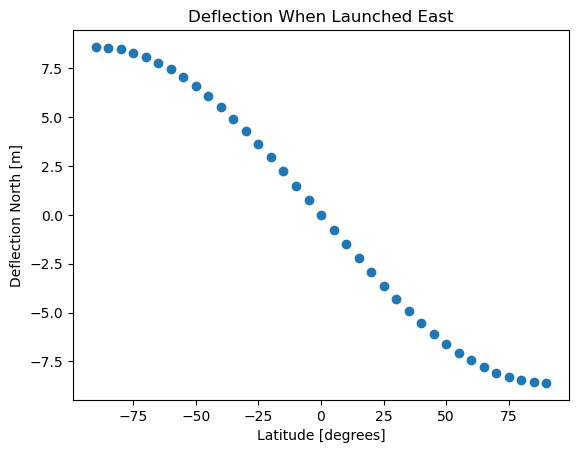

In [12]:
# plot our results
plt.plot(latitudes, deflection, 'o')
plt.title('Deflection When Launched East')
plt.xlabel('Latitude [degrees]')
plt.ylabel('Deflection North [m]')
plt.show()

As we can see, our deflection is maximum at the poles and zero at the equator. Additionally, we deflect toward the South when firing East in the Northern hemisphere, and deflect North in the Southern hemisphere. Lets see what happens when we repeat the experiment, but fire the object directly West.

In [13]:
# create projectiles
projectiles = []
for i in latitudes:
    gcs0 = [i,0,0]
    p = local_projectile(gcs0, v0, [45,270], D, m, Cd)
    projectiles.append(p)

# launch projectiles
for proj in projectiles:
    proj.launch_to_impact(dt=0.1, approx=False)

deflection2 = []
for proj in projectiles:
    defl = proj.solution[1][-1]
    deflection2.append(defl)

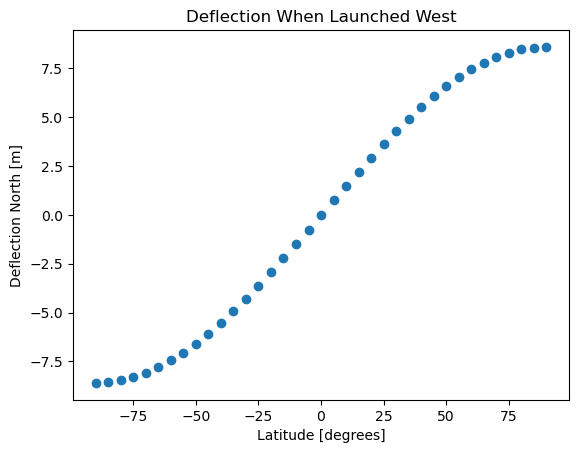

In [14]:
plt.plot(latitudes, deflection2, 'o')
plt.title('Deflection When Launched West')
plt.xlabel('Latitude [degrees]')
plt.ylabel('Deflection North [m]')
plt.show()

In this case it's the opposite! If you launch East in the Northern hemisphere, you deflect South. But if you launch West, you deflect North. While in the Southern hemisphere it is the opposite. One way to think about this is that anything in the Northern hemisphere will be pushed to the right, while anything moving in the Southern hemisphere will be pushed to the left. Hurricanes are a good example of this, with storms in the North spinning counterclockwise, while southern hemisphere storms spin clockwise.

# First order approximation vs numerical solution
I analytically derived an approximation of the equations of motion for the coriolis force in a vacuum. This was crucial to developing the full numerical solutions, as I needed something to check my answers to analytically while building up the code. Let's explore how the approximation compares to the full numerical solution. We'll turn quadratic drag "off" in our numerical solution by setting the drag coefficient to zero.

In [15]:
gcs0 = [45,0,0]
v0 = 1000
alt_az = [45, 90]
Cd = 0

proj = local_projectile(gcs0, v0, alt_az, D, m, Cd)
proj.launch_to_impact()

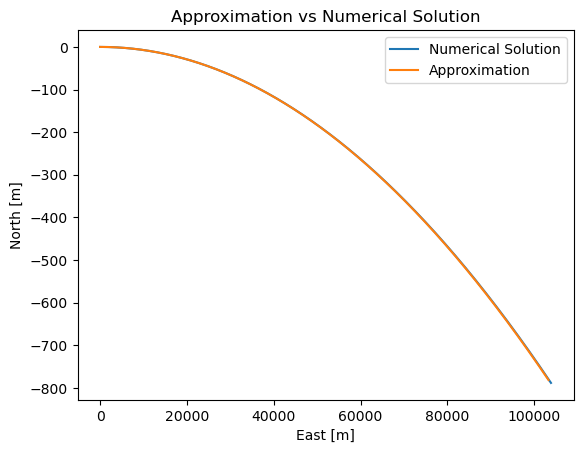

In [16]:
plt.plot(proj.solution[0], proj.solution[1], label='Numerical Solution')
plt.plot(proj.coriolis_approximation[0], proj.coriolis_approximation[1], label='Approximation')
plt.title('Approximation vs Numerical Solution')
plt.ylabel('North [m]')
plt.xlabel('East [m]')
plt.legend()
plt.show()

Even at 100 km, our results are comparable. For motion in a vacuum, the approximation is reasonable within a few hundred kilometers.

# Global vs Local Classes
So far we have only been using the local_projectile class. This uses a semi flat Earth model to calculate trajectories (see the readme for more details).  While this is fine for distances within a few hundred km, any further and we need to switch our calculation methods up. The global_projectile class operates largly the same from a user's perspective, but can handle much further trajectories with higher accuracy because it uses equations derived in a geocentric reference frame rather than a local one. We'll do a comparison between the two, so we can see how the local calculation of the coriolis force breaks down as our latitude changes significantly. We'll also keep the drag force "off" for now.

In [17]:
gcs0 = [45,0,0]
v0 = 5000
alt_az = [45, 90]
D = 0.1
m = 1
Cd = 0

lp = local_projectile(gcs0, v0, alt_az, D, m, Cd)
gp = global_projectile(gcs0, v0, alt_az, D, m, Cd)

lp.launch_to_impact(dt=0.1)
gp.launch_to_impact(dt=0.1)

[]

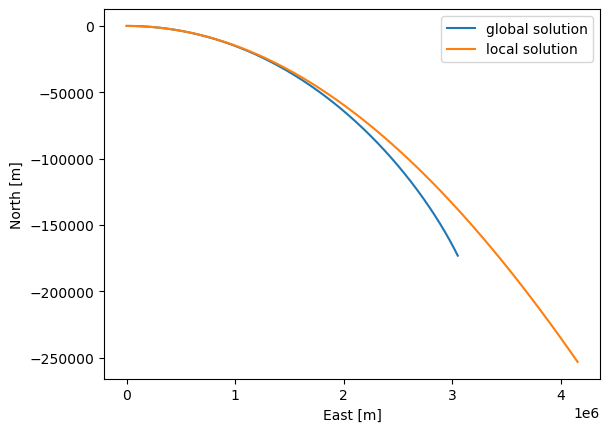

In [18]:
plt.plot(gp.enu_soln[0], gp.enu_soln[1], label='global solution')
plt.plot(lp.solution[0], lp.solution[1], label='local solution')
plt.xlabel('East [m]')
plt.ylabel('North [m]')
plt.legend()
plt.plot()

We can see that as we extended our firing range, the calculation in the local reference frame starts to diverge quite rapidly.

# Using Google Earth to View Results
One of the main goals of this project was to be able to visualize global scale projectile motion in an interesting way. One method is to take our results, and export them into Google Earth. We use simplekml, a python module that can export our gcs coordinates into a format that Earth can read. The global_projectile class calculates a gcs solution as a byproduct of the launch_to_impact method. Our local_projectile calculates a gcs solution by converting the distance travelled in the local reference frame to the arc length travelled along the Earth's surface. From the arc length, we can convert to the change in latitude and longitude fairly easily.

We then just need to get our gcs solutions in the form of tuples for the simplekml module to handle. There's a utility in the shared_utils file that handles this. First though, let's plot a couple sub orbital trajectories in python, before visualizing the same data in Google Earth. We'll include air resistance in this. However, making it through the entirety of the atmosphere with no thrust is a tough challenge. So we'll start our trajectory at a height of 80 km. If our projectile were a rocket, we could think of this as the "free flight" ballistic trajectory after our engines burned out. 

In [19]:
gcs0 = [30,0,80000]
v0 = 2500
alt_az = [45, 45]
D = 0.1
m = 1
Cd = 0.47

gp = global_projectile(gcs0, v0, alt_az, D, m, Cd)
lp = local_projectile(gcs0, v0, alt_az, D, m, Cd)
gp.launch_to_impact(dt=0.1)
lp.launch_to_impact(dt=0.1)

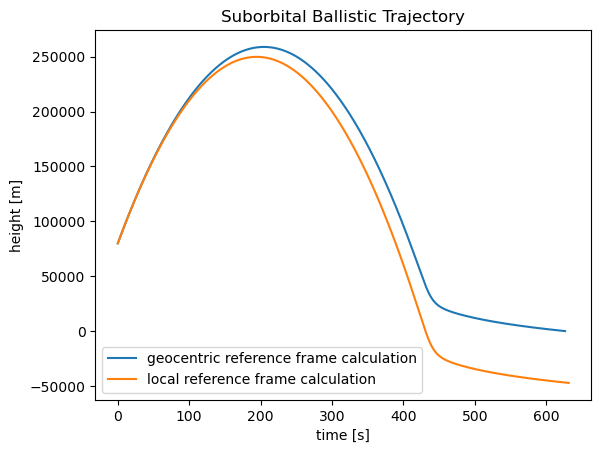

In [20]:
plt.plot(gp.times, gp.gcs_soln[2], label='geocentric reference frame calculation')
plt.plot(lp.solution[3], lp.solution[2], label='local reference frame calculation')
plt.title('Suborbital Ballistic Trajectory')
plt.xlabel('time [s]')
plt.ylabel('height [m]')
plt.legend()
plt.show()

Again, we see that at these distances, the calculation in the local reference frame has diverged significantly.

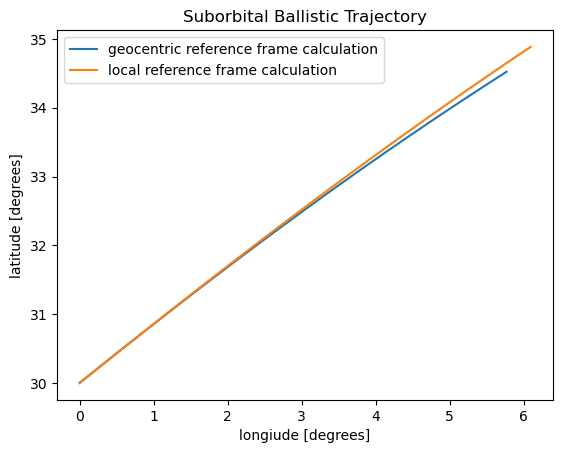

In [21]:
plt.plot(gp.gcs_soln[1], gp.gcs_soln[0], label='geocentric reference frame calculation')
plt.plot(lp.gcs_soln[1], lp.gcs_soln[0], label='local reference frame calculation')
plt.title('Suborbital Ballistic Trajectory')
plt.xlabel('longiude [degrees]')
plt.ylabel('latitude [degrees]')
plt.legend()
plt.show()

# Exporting to Google Earth
Let's set one more experiment up, and then export the data to be viewed in Google Earth. We'll set our post burnout (initial) velocity fairly high, as well as the altitude to 45 degrees to maximize the range of our projectile. Then we'll run two launches, with and without the Earth's rotation, to see how much it effects this suborbital flight.

In [22]:
# launch from cape canaveral
gcs0 = [28.3922,-80.6077, 80000] # engine burnout at 80 km
v0 = 6000 # velocity after burnout
alt_az = [45, 45]

# a solid steel sphere 1 m in diameter
D = 1
m = 4000
Cd = 0.47

gp = global_projectile(gcs0, v0, alt_az, D, m, Cd)

# with rotation
gp.launch_to_impact()
rot = gp.gcs_soln

# no rotation
gp.launch_to_impact(omega=0)
no_rot = gp.gcs_soln

In [23]:
# converting the gcs solution to the correct format

from shared_utils import export_gcs_coord

rot_soln = export_gcs_coord(rot)
no_rot_soln = export_gcs_coord(no_rot)

In [24]:
# should be in the form of tuples
no_rot_soln[0]

[-80.6077, 28.392199999999995, 80000.0]

In [25]:
# creating the kml file using simple kml
import simplekml

kml = simplekml.Kml()

s1 = kml.newlinestring(name='Rotating Earth', coords=rot_soln)
s1.altitudemode = simplekml.AltitudeMode.absolute
s1.extrude = 0
s1.style.linestyle.width = 3
s1.style.linestyle.color = simplekml.Color.blue

s2 = kml.newlinestring(name='No Rotation', coords=no_rot_soln)
s2.altitudemode = simplekml.AltitudeMode.absolute
s2.extrude = 0
s2.style.linestyle.width = 3
s2.style.linestyle.color = simplekml.Color.red

kml.save('kml_files/sub orbital test.kml')

# Viewing our results!

The red line is our trajectory with no rotation, the blue line our "true" solution. As expected, the true solution gets defelected to the right.

![first image](screenshot.png)

## How far apart are the two solutions?
Using the built in tape measure we can see that not accounting for rotation puts us off target by almost 300 km!

![measurement](measurement.png)